- 学修番号: 22745102
- 氏名: 岩間和也

# 課題 2.2　クラスタ分析

課題 2.2 クラスタ分析は、各自の興味に沿ったデータセットを取得し、分析してください。
クラスタ分析は、教師なし学習であり、正解ラベルはありません。
結果の解釈にはデータの理解が必要となりますので、興味があるデータについて分析してみてください。

分析は、以下の 2.2.1 ~ 2.2.4 について行ってください。

- 2.2.1 データセットの取得
- 2.2.2 階層的クラスタ分析
- 2.2.3 非階層的クラスタ分析
- 2.2.4 考察

### 2.2.1 データセットの取得、読み込み

2.2.1 では以下を行うこと。

- データセットの取得方法を記載
  - 取得、実行し、結果を確認できるように記載すること
- データセットの説明を記載
  - 処理内容を理解できるように説明を記載すること
- データセットの読み込み
  - （必要ならば）処理対象となるように加工


<hr>

### データセットの取得方法

https://footystats.org/japan/j1-league

Download CSV DataボタンからPlayer CSVをダウンロード

有料会員でないと取得できないデータのため、CSVを添付します

同じ階層のフォルダ名 data(import-85.dataが入っているフォルダ) に本データセットのCSVを配置する

### データセットの説明

2022年のサッカーJ1の所属選手についてのCSVデータ

名前や年齢 出場時間やゴール数、アシスト数などの情報が含まれている

In [1]:
import pandas as pd
import numpy as np
player = pd.read_csv('data/japan-j1-league-players-2022-to-2022-stats.csv')

# 確認
player.describe()

,age,birthday,season,minutes_played_overall,minutes_played_home,minutes_played_away,appearances_overall,appearances_home,appearances_away,goals_overall,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
count,567.000000,5.670000e+02,567.0,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,...,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000
mean,26.864198,8.048310e+08,2022.0,1062.832451,531.440917,531.391534,16.631393,8.326279,8.305115,1.313933,...,1.163616,70.298060,51.536155,415.506173,383.992945,0.140811,147.197531,147.229277,17.366843,13.687831
std,4.890053,1.548854e+08,0.0,923.147419,472.668636,459.681091,11.229847,5.705778,5.680886,2.262039,...,1.217585,43.653928,27.895344,570.448277,623.241169,0.663592,136.552491,136.568510,37.918960,9.371009
min,17.000000,3.072636e+08,2022.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,23.000000,6.984000e+08,2022.0,188.000000,90.000000,100.500000,6.000000,3.000000,3.000000,0.000000,...,0.820000,53.000000,31.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,6.000000
50%,27.000000,8.096796e+08,2022.0,879.000000,410.000000,450.000000,18.000000,9.000000,8.000000,0.000000,...,1.090000,74.000000,54.000000,178.000000,0.000000,0.050000,125.000000,125.000000,-1.000000,14.000000
75%,30.000000,9.198864e+08,2022.0,1789.000000,908.000000,896.500000,27.000000,14.000000,13.000000,2.000000,...,1.345000,91.000000,76.000000,643.500000,600.500000,0.160000,267.500000,267.500000,0.000000,21.500000
max,43.000000,1.121411e+09,2022.0,3060.000000,1530.000000,1530.000000,34.000000,17.000000,17.000000,14.000000,...,22.500000,418.000000,90.000000,3060.000000,2970.000000,15.000000,409.000000,409.000000,143.000000,34.000000


<hr>

### データセットの加工

出場時間とゴール数とアシスト数に絞る

ポジションによらないクラスタ分類を目標とする

In [2]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# full_nameとpositionを結合
player['full_name'] = player['full_name'].str.cat(player['position'], sep=': ')

# インデックスラベルにfull_nameを使用
df = player.set_index('full_name')

# 出場時間と得点とアシスト
# 使用するラベルのみに絞る
df = df[['minutes_played_overall', 'goals_overall', 'assists_overall']]

# 確認
df.describe()

,minutes_played_overall,goals_overall,assists_overall
count,567.000000,567.000000,567.000000
mean,1062.832451,1.313933,0.948854
std,923.147419,2.262039,1.574710
min,0.000000,0.000000,0.000000
25%,188.000000,0.000000,0.000000
50%,879.000000,0.000000,0.000000
75%,1789.000000,2.000000,1.000000
max,3060.000000,14.000000,10.000000


### 2.2.2 階層的クラスタ分析

2.2.2 では以下（樹形図とヒートマップ付きの樹形図とは別々に作成する）を行うこと。必要ならば他の処理を記載しても構わない。

- 樹形図（デンドログラム）の作成
- ヒートマップ付きの樹形図の作成

In [3]:
from sklearn.preprocessing import StandardScaler
# 得点系と出場時間の値の差が大きいのでまず標準化する
sc = StandardScaler()
sc.fit(df)

X = pd.DataFrame(sc.transform(df), index=df.index, columns=df.columns)

# 出力の表記を設定
# - pd.options.display.float_format: 小数点以下の表示方法を指定
pd.options.display.float_format = '{:.2f}'.format

# 確認
X.head()

,minutes_played_overall,goals_overall,assists_overall
full_name,,,
Adailton dos Santos da Silva: Midfielder,0.67,4.73,0.67
Adam Taggart: Forward,-0.14,1.63,-0.60
Akihiro Hayashi: Goalkeeper,-1.15,-0.58,-0.60
Akihiro Ienaga: Midfielder,1.82,4.73,2.57
Akimi Barada: Midfielder,0.79,-0.58,1.94


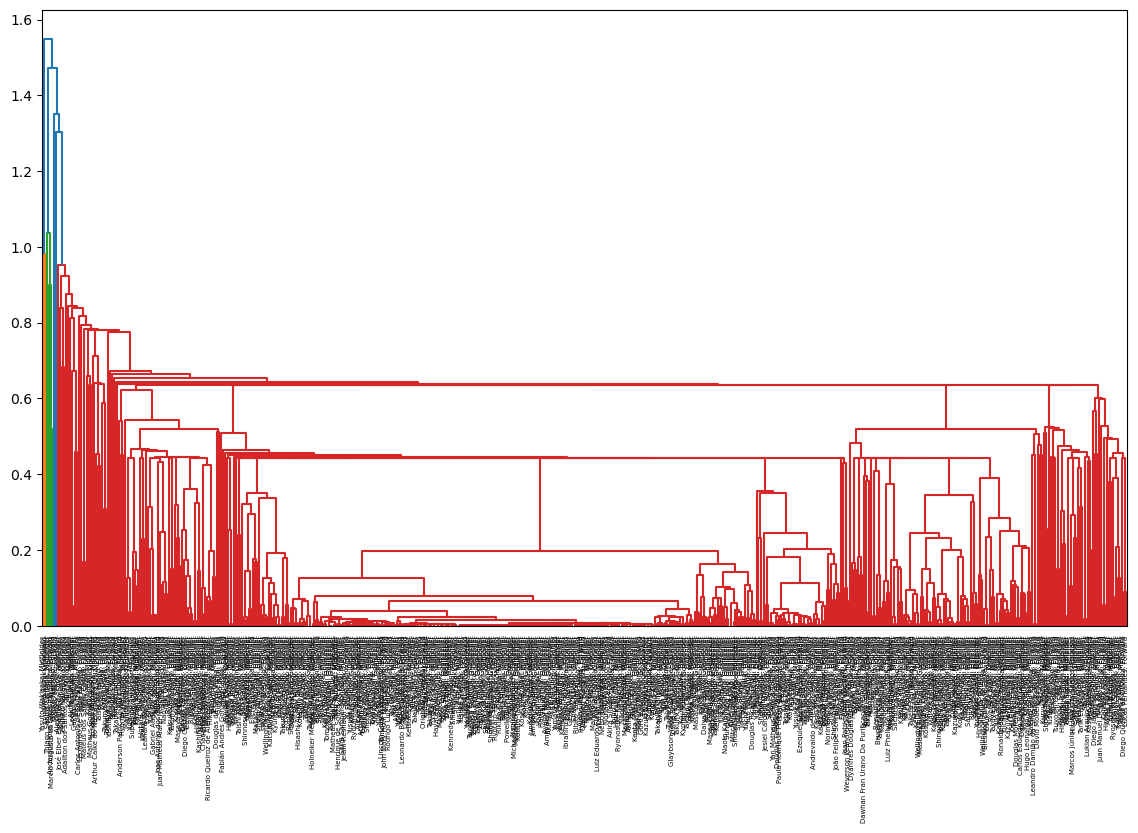

In [4]:
# - metric='euclidean' ユークリッド距離
# - method='single' 最小非類似度
clusters = linkage(X.values, method='single', metric='euclidean')
# # 樹形図を作成
plt.figure(figsize=(14, 8))
dendr = dendrogram(clusters, labels=X.index)


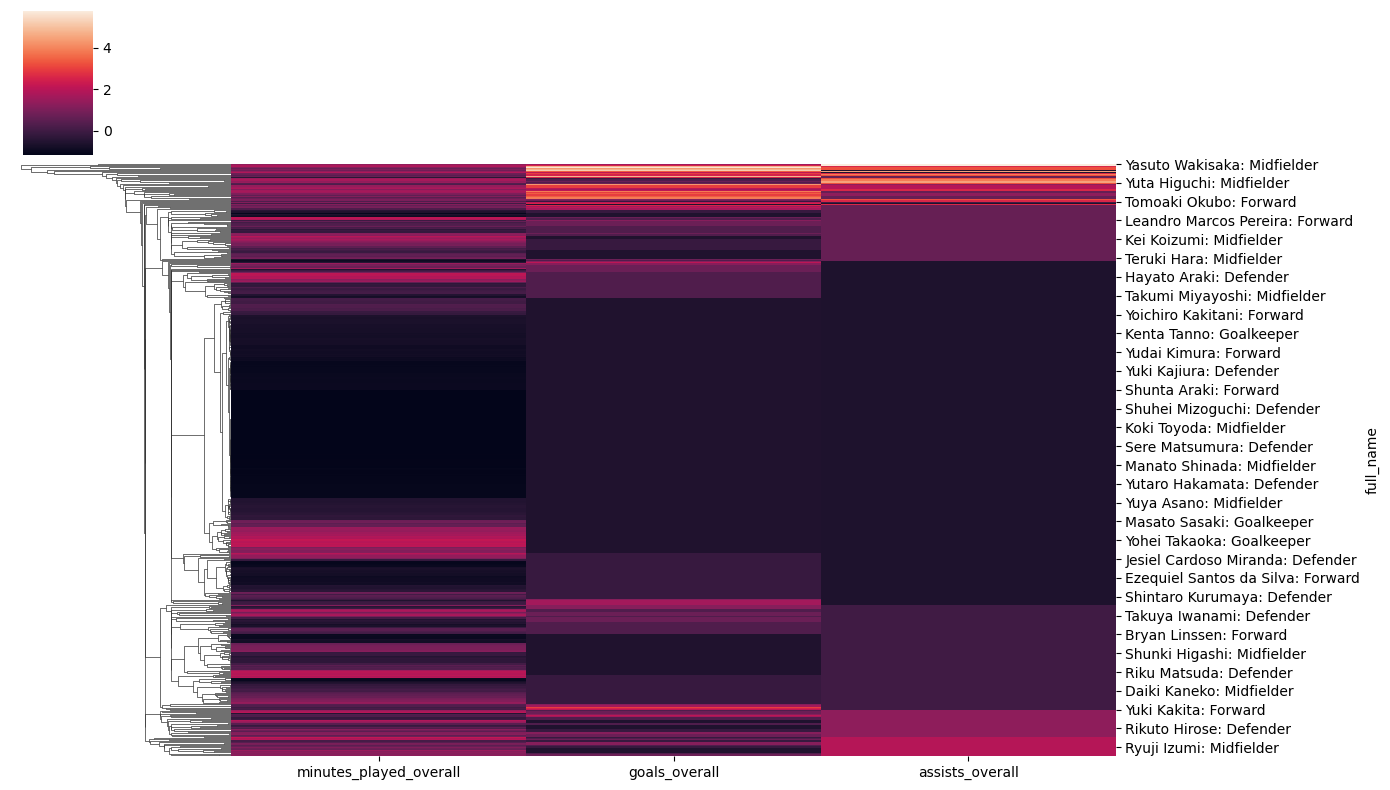

In [5]:
import seaborn as sns
# ヒートマップ付き樹形図を作成
# - method='single' 最小非類似度
# - col_cluster=False 列について樹形図は作成しない
sns.clustermap(X, method='single', metric='euclidean', figsize=(14, 8),
               col_cluster=False)

<hr>

ヒートマップの見た目や樹形図の枝の長さからは4つか5つくらいのクラスタに分類できそうに感じる

In [6]:
from scipy.cluster.hierarchy import cut_tree
# cut_tree: 指定したクラスタ数でのラベル（クラスタ番号）を取得
# - np.ndarray.flatten: cut_tree は多次元配列で返すので、1次元配列に変換
labels = np.ndarray.flatten(cut_tree(clusters, 4))

# クラスタ番号を結合したDataFrameを作成
df_cluster = pd.concat([df, pd.DataFrame(labels, index=X.index, columns=['cluster'])], axis=1)

# クラスタごとの平均値
df_cluster.groupby('cluster').mean()

,minutes_played_overall,goals_overall,assists_overall
cluster,,,
0,1048.62,1.20,0.88
1,2146.50,12.25,5.75
2,1795.00,13.00,0.00
3,2509.50,6.00,10.00


In [7]:
from scipy.cluster.hierarchy import cut_tree
# cut_tree: 指定したクラスタ数でのラベル（クラスタ番号）を取得
# - np.ndarray.flatten: cut_tree は多次元配列で返すので、1次元配列に変換
labels = np.ndarray.flatten(cut_tree(clusters, 5))

# クラスタ番号を結合したDataFrameを作成
df_cluster = pd.concat([df, pd.DataFrame(labels, index=X.index, columns=['cluster'])], axis=1)

# クラスタごとの平均値
df_cluster.groupby('cluster').mean()

,minutes_played_overall,goals_overall,assists_overall
cluster,,,
0,1046.27,1.18,0.87
1,2146.50,12.25,5.75
2,2359.00,9.00,8.00
3,1795.00,13.00,0.00
4,2509.50,6.00,10.00


### 2.2.3 非階層的クラスタ分析

2.2.3 では以下を行うこと。必要ならば他の処理を記載しても構わない。

- クラスタ数の推定
  - エルボー法
  - シルエット分析
- KMeans法によるクラスタ分析
  - クラスタ数の設定については理由を記載すること
  - クラスタ分析の結果は可視化も用いて説明すること

<hr>

###　どの程度のクラスタ数がよさそうか？

データ上のポジションは4種類

Goalkeeper, Defender, Midfielder, Forward

出場していない選手も含まれている

実際はゴールキーパー以外のポジションはもう少し細分化されると予想


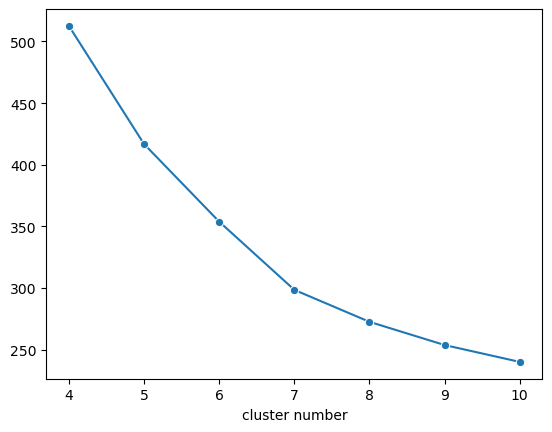

In [8]:
from sklearn.cluster import KMeans

# エルボー法
distortions = []
for n in range(4, 11):
    model = KMeans(n_clusters=n, random_state=0)
    model.fit(X)
    distortions.append(model.inertia_)

sns.lineplot(x=range(4, 11), y=distortions, marker='o')
plt.xlabel('cluster number')
plt.show()

<hr>

なだらか気味ではあるもののエルボー法では5もしくは7つのクラスタになりそう

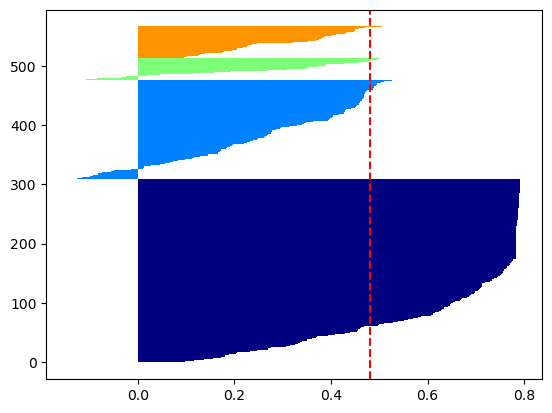

4 Clusters: Average silhouette width: 0.481


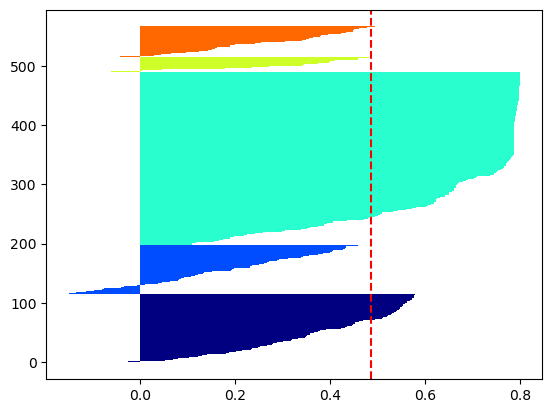

5 Clusters: Average silhouette width: 0.486


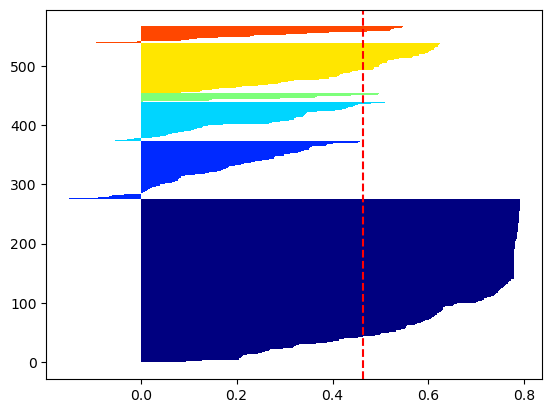

6 Clusters: Average silhouette width: 0.464


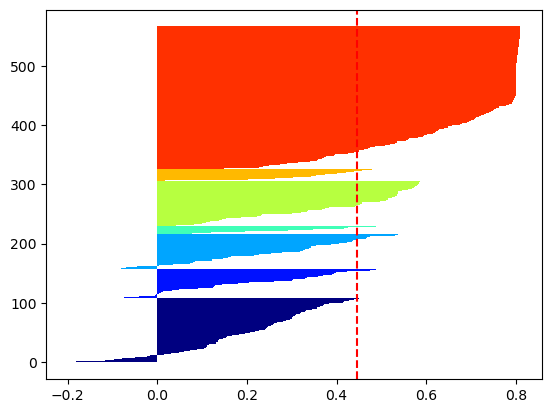

7 Clusters: Average silhouette width: 0.447


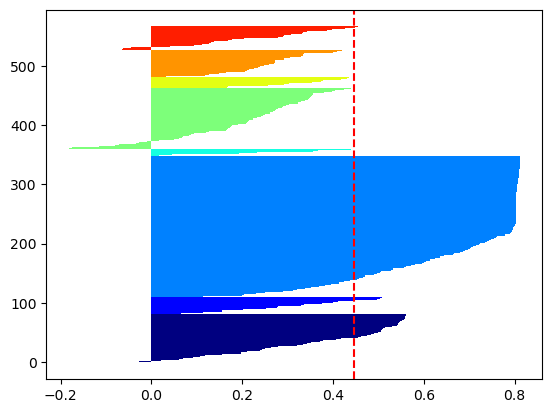

8 Clusters: Average silhouette width: 0.445


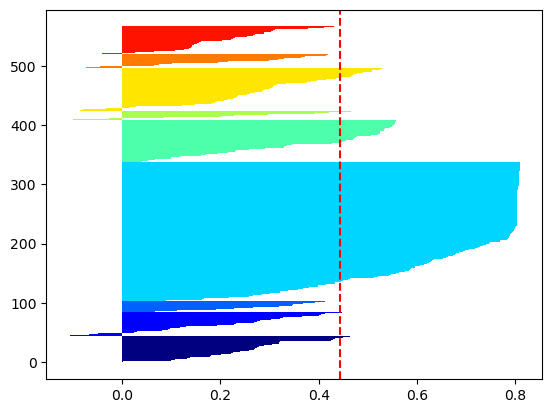

9 Clusters: Average silhouette width: 0.443


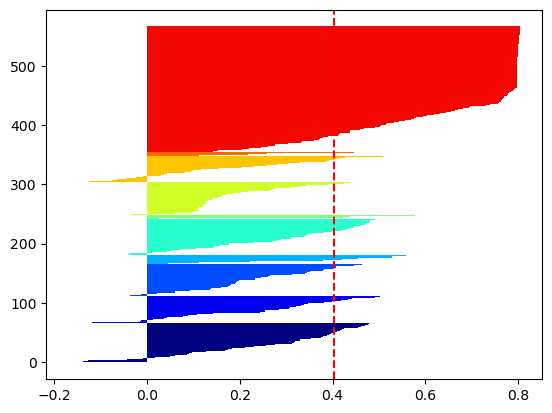

10 Clusters: Average silhouette width: 0.403


In [9]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm

# シルエット分析
def silhouette(n):
    model = KMeans(n_clusters=n, random_state=0)
    model.fit(X)
    cluster_labels = set(model.labels_)
    n_clusters = len(cluster_labels)
    silhouette_vals = silhouette_samples(X, model.labels_, metric='euclidean')
    y_lower, y_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[model.labels_ == c]
        c_silhouette_vals.sort()
        y_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_lower, y_upper), c_silhouette_vals, height=1.0,
                 edgecolor='none', color=color)
        yticks.append((y_lower + y_upper) / 2.)
        y_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.show()
    print('{} Clusters: Average silhouette width: {:.3f}'.format(n, silhouette_avg))

for n in range(4, 11):
    silhouette(n)

<hr>

シルエット係数が最大になるのは5　次点で4

<hr>

以上より妥当なクラスタ数を決定する

n = 5　次点で4

<hr>

### クラスタ別出場時間

n_clusters: 5


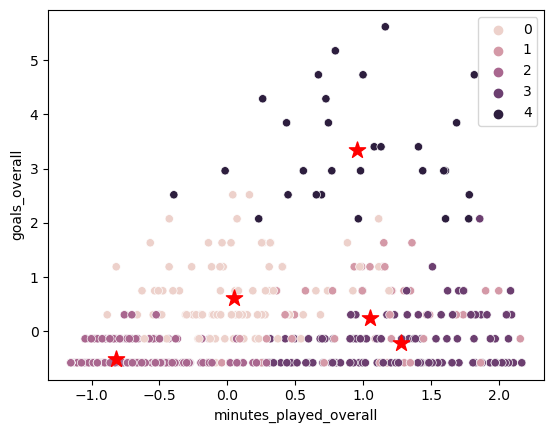

n_clusters: 5


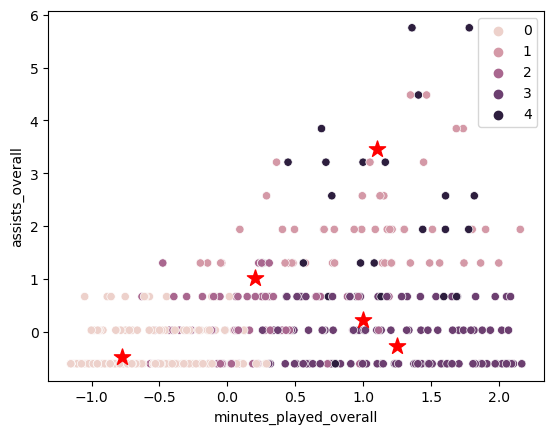

In [10]:
# 散布図
def kmeans_plot_with_axis(n, axis_X, axis_Y):
    print('n_clusters:', n)
    model = KMeans(n_clusters=n)
    model.fit(X)
    # クラスタリング結果を散布図を描画
    sns.scatterplot(x=axis_X, y=axis_Y, hue=model.labels_)
    # 重心をプロット
    plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],
                marker='*', color='red', s=150)
    plt.show()

kmeans_plot_with_axis(5, X.minutes_played_overall, X.goals_overall)
kmeans_plot_with_axis(5, X.minutes_played_overall, X.assists_overall)

<AxesSubplot:xlabel='minutes_played_overall', ylabel='Count'>

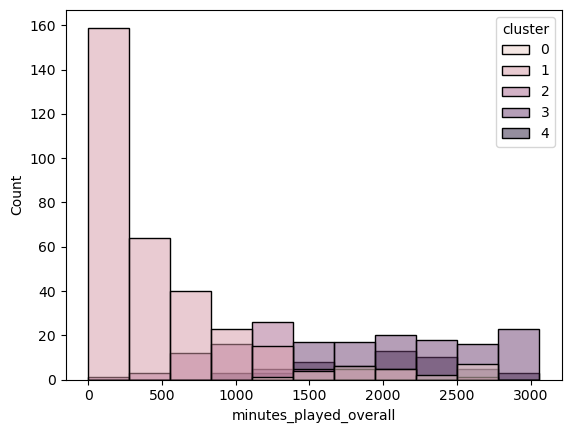

In [11]:
# ヒストグラム
# K-means によるクラスタリング
model = KMeans(n_clusters=5)
model.fit(X)

# クラスタ番号を結合したDataFrameを作成
df_cluster = pd.concat([df, pd.DataFrame(model.labels_, index=X.index, columns=['cluster'])], axis=1)

# クラスタごとの平均値
df_cluster.groupby('cluster').mean()

# インデックスの重複エラーを回避する
df_cluster_hist = df_cluster.reset_index()


sns.histplot(data=df_cluster_hist, x='minutes_played_overall', hue='cluster')

<hr>

出場時間の短い選手でクラスタが形成されているのが確認できる

In [12]:
# クロス集計
# 出場時間の区間
bins = [0, 300, 600, 900, 1200, 1500, 1800, 2100, 2400, 2700, 3000]

minute_freq = pd.cut(df_cluster.minutes_played_overall, bins, right=False)

df_minute = pd.concat([df_cluster.cluster, minute_freq], axis=1)
df_minute_cross = pd.crosstab(df_minute.cluster, df_minute.minutes_played_overall)

# 確認
df_minute_cross

minutes_played_overall,"[0, 300)","[300, 600)","[600, 900)","[900, 1200)","[1200, 1500)","[1500, 1800)","[1800, 2100)","[2100, 2400)","[2400, 2700)","[2700, 3000)"
cluster,,,,,,,,,,
0,0,0,0,0,3,8,3,4,4,3
1,165,66,40,23,7,0,0,0,0,0
2,1,6,11,25,19,4,6,1,0,1
3,0,0,0,0,10,20,20,20,18,25
4,0,0,0,4,6,9,6,14,7,4


<hr>

ヒストグラムで読み取れなかったのは4つのクラスタ

出場時間が1000分前後と1500 - 2400分くらいまででクラスタとして集まっている

残りの二つは出場時間以外が主な要因に思える

<AxesSubplot:xlabel='minutes_played_overall', ylabel='cluster'>

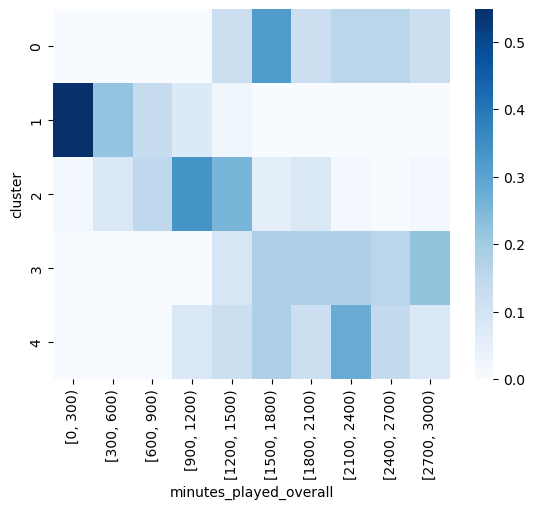

In [13]:
# ヒートマップ
sns.heatmap(df_minute_cross.apply(lambda x: x/x.sum(), axis=1), cmap='Blues')

<hr>

### クラスタ別ゴール数

n_clusters: 5


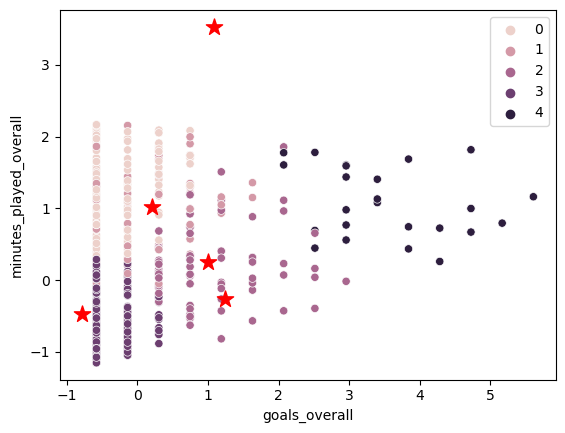

n_clusters: 5


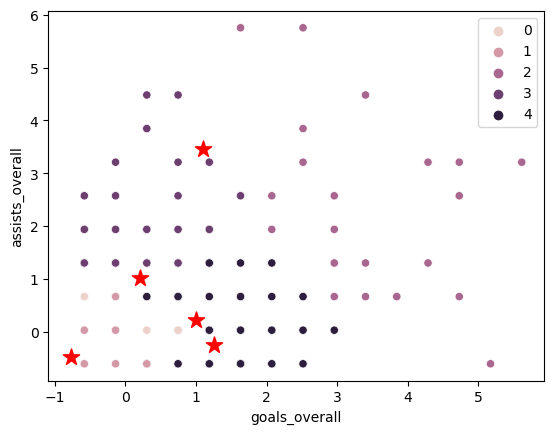

In [14]:
# 散布図
kmeans_plot_with_axis(5, X.goals_overall, X.minutes_played_overall)
kmeans_plot_with_axis(5, X.goals_overall, X.assists_overall)

<AxesSubplot:xlabel='goals_overall', ylabel='Count'>

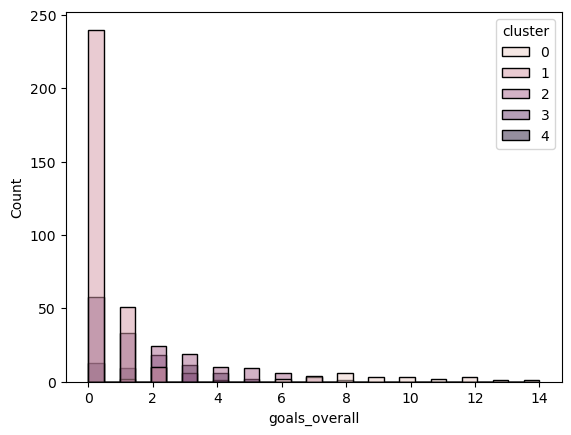

In [15]:
# ヒストグラム
sns.histplot(data=df_cluster_hist, x='goals_overall', hue='cluster')

<hr>

高得点でクラスタが形成できているのが確認できる

In [16]:
# クロス集計
# ゴール数の区間　0から14
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

goal_freq = pd.cut(df_cluster.goals_overall, bins, right=False)

df_goal = pd.concat([df_cluster.cluster, goal_freq], axis=1)
df_goal_cross = pd.crosstab(df_goal.cluster, df_goal.goals_overall)

# 確認
df_goal_cross

goals_overall,"[0, 1)","[1, 2)","[2, 3)","[3, 4)","[4, 5)","[5, 6)","[6, 7)","[7, 8)","[8, 9)","[9, 10)","[10, 11)","[11, 12)","[12, 13)","[13, 14)"
cluster,,,,,,,,,,,,,,
0,0,0,0,0,0,0,2,4,6,3,3,2,3,1
1,240,51,10,0,0,0,0,0,0,0,0,0,0,0
2,0,2,24,19,10,9,6,3,1,0,0,0,0,0
3,58,33,18,6,1,0,0,0,0,0,0,0,0,0
4,13,9,10,11,6,2,0,0,0,0,0,0,0,0


<hr>

得点力が高いクラスタがひとつある

0点から5点前後まで幅があるクラスタがひとつある

クラスタ二つは得点以外の要因による分類になっていそう

### クラスタ別アシスト数

n_clusters: 5


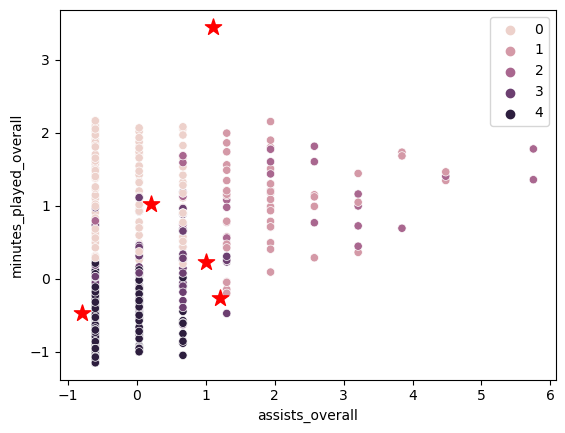

n_clusters: 5


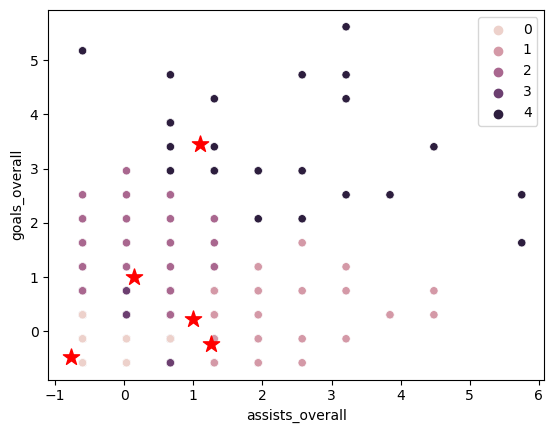

In [17]:
# 散布図
kmeans_plot_with_axis(5, X.assists_overall, X.minutes_played_overall)
kmeans_plot_with_axis(5, X.assists_overall, X.goals_overall)

<AxesSubplot:xlabel='assists_overall', ylabel='Count'>

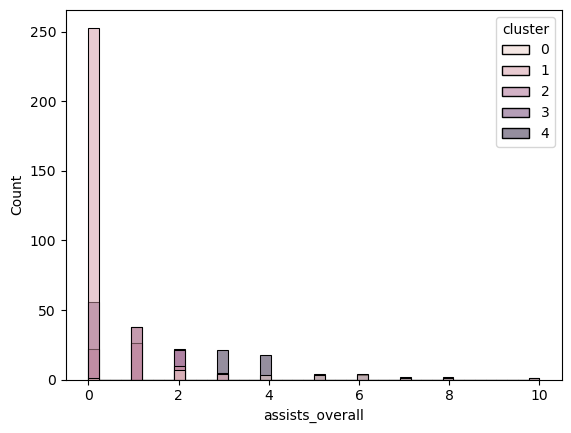

In [18]:
# ヒストグラム
sns.histplot(data=df_cluster_hist, x='assists_overall', hue='cluster')

<hr>

高アシスト得点でクラスタが形成できているのが確認できる

In [19]:
# クロス集計
# ゴール数の区間　0から10
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

assist_freq = pd.cut(df_cluster.assists_overall, bins, right=False)

df_assist = pd.concat([df_cluster.cluster, assist_freq], axis=1)
df_assist_cross = pd.crosstab(df_assist.cluster, df_assist.assists_overall)

# 確認
df_assist_cross

assists_overall,"[0, 1)","[1, 2)","[2, 3)","[3, 4)","[4, 5)","[5, 6)","[6, 7)","[7, 8)","[8, 9)"
cluster,,,,,,,,,
0,1,0,7,4,3,3,4,1,1
1,253,38,10,0,0,0,0,0,0
2,22,26,21,5,0,0,0,0,0
3,56,38,22,0,0,0,0,0,0
4,0,0,0,21,18,4,3,2,2


<hr>

一つはある程度のアシスト得点がある選手のクラスタだとわかる

アシスト数が散らばっていてほとんど特徴のないクラスタがある

3つのクラスタは0-3までのアシスト数に偏っている

### 2.2.4 考察

- 階層的、非階層的クラスタ分析の結果について考察

In [20]:
# 再びクラスタごとの平均値を表示する
df_cluster.groupby('cluster').mean()

,minutes_played_overall,goals_overall,assists_overall
cluster,,,
0,2051.20,9.20,4.08
1,346.07,0.24,0.19
2,1179.54,3.47,1.12
3,2218.38,0.78,0.71
4,2010.98,1.88,4.18


In [21]:
# 各クラスタの要素をアウトプット
for n in range(0, 5):
    name = list(X[model.labels_==n].index)
    print('クラスタ{}：{}'.format(n, list(X[model.labels_==n].index)))

クラスタ0：['Adailton dos Santos da Silva: Midfielder', 'Akihiro Ienaga: Midfielder', 'Anderson José Lopes de Souza: Forward', 'Arthur Caike do Nascimento Cruz: Forward', 'Ayase Ueda: Forward', 'José Elber Pimentel da Silva: Midfielder', 'Kota Mizunuma: Midfielder', 'Leonardo de Sousa Pereira: Forward', 'Makoto Mitsuta: Forward', 'Mao Hosoya: Forward', 'Marcio Augusto da Silva Barbosa: Midfielder', 'Mateus dos Santos Castro: Forward', 'Matheus Gonçalves Sávio: Forward', 'Peter Utaka: Forward', 'Ryota Aoki: Midfielder', 'Shuto Machino: Forward', 'Taisei Miyashiro: Forward', 'Takuma Nishimura: Forward', 'Teruhito Nakagawa: Forward', 'Thiago Santos Santana: Midfielder', 'Tsukasa Morishima: Midfielder', 'Yuma Suzuki: Forward', 'Yuto Suzuki: Forward', 'Yūya Ōsako: Forward', 'Yuya Yamagishi: Midfielder']
クラスタ1：['Akihiro Hayashi: Goalkeeper', 'Akinari Kawazura: Defender', 'Akira Ibayashi: Defender', 'Akira Silvano Disaro: Forward', 'Akira Yoshida: Defender', 'Akito Suzuki: Forward', 'Alan Lima Car

<hr>

### どのようなクラスタがあるか

出場機会の少ない選手のクラスタ→控え

出場時間が長く、得点奪取能力が高い選手クラスタ→エース選手

出場時間はさほど長くはないが、得点を取ることが多いクラスタ→スーパーサブ、ストライカー型の選手

ゴールよりアシストが多い選手→クロスなどをあげて前線の選手にパスを供給する選手？

ゴールやアシストに絡まない出場時間の長い選手→ゴールキーパー、ゴールキーパー以外の場合、セットプレーにもあまり絡まないセンターバックの選手？

クラスタごとの選手の傾向を考察しているが、逆にポジションにそぐわないクラスタに分類されている選手もいる。例えば特にゴールキーパーなどと同じクラスタに入っているフォワードの選手などは成績不振だといえる。